In [ ]:
import pandas as pd

# Read file
file_path = "spotify_tracks_with_gender.csv"
df = pd.read_csv(file_path)

# Clean up artist_gender and trim to lowercase
cleaned_gender = df['artist_gender'].fillna('').astype(str).str.strip().str.lower()

# Define valid gender values
valid_genders = [
    'female', 'male', 'non-binary gender', 'genderfluid', 'trans woman', 'agender', 'neutral sex'
]

# Only keep valid entries
filtered_df = df[cleaned_gender.isin(valid_genders)]

# Save filtered DataFrame
filtered_df.to_csv("spotify_tracks_with_gender_filtered.csv", index=False)

# Create descriptive statistics
numeric_stats = filtered_df.describe()
categorical_stats = filtered_df.describe(include=['object'])

# Show
print("\nNumerical Statistics:\n", numeric_stats)
print("\nCategorical Statistics:\n", categorical_stats)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data
file_path = "spotify_tracks_with_gender_filtered.csv"
df = pd.read_csv(file_path)

# Show all column names
print("Column overview:", df.columns.tolist())

# 1. Descriptive statistics for numerical columns
desc_numeric = df.describe()
print("\nNumerical statistics:\n", desc_numeric)


Column overview: ['playlist_id', 'playlist_name', 'track_position', 'track_name', 'artist_name', 'album_name', 'track_uri', 'artist_uri', 'album_uri', 'track_duration_ms', 'artist_gender']

Numerical statistics:
         playlist_id  track_position  track_duration_ms
count  3.174887e+06    3.174887e+06       3.174887e+06
mean   1.297466e+05    5.402403e+01       2.312768e+05
std    4.805673e+04    4.816304e+01       5.688718e+04
min    0.000000e+00    0.000000e+00       2.060000e+02
25%    1.137590e+05    1.700000e+01       2.001330e+05
50%    1.387200e+05    4.000000e+01       2.243910e+05
75%    1.639120e+05    7.900000e+01       2.533730e+05
max    1.889990e+05    2.490000e+02       4.789226e+06


In [6]:
import pandas as pd

# Read Data
file_path = "spotify_tracks_with_gender_filtered.csv"
df = pd.read_csv(file_path)

# 2. Frequencies of categories in 'artist_gender'
gender_counts = df['artist_gender'].value_counts()
print("\nFrequencies of 'artist_gender':\n", gender_counts)



Frequencies of 'artist_gender':
 artist_gender
male                 2459171
female                666351
non-binary gender      47022
genderfluid             1821
agender                  334
trans woman              174
neutral sex               14
Name: count, dtype: int64


In [7]:
# 3. Average track popularity per gender (if 'track_popularity' is available)
if 'track_popularity' in df.columns:
    avg_popularity = df.groupby('artist_gender')['track_popularity'].mean().sort_values(ascending=False)
    print("\nAverage Track Popularity by Gender:\n", avg_popularity)

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_popularity.index, y=avg_popularity.values)
    plt.title("Average Track Popularity by Gender")
    plt.ylabel("Track Popularity")
    plt.xlabel("Gender")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


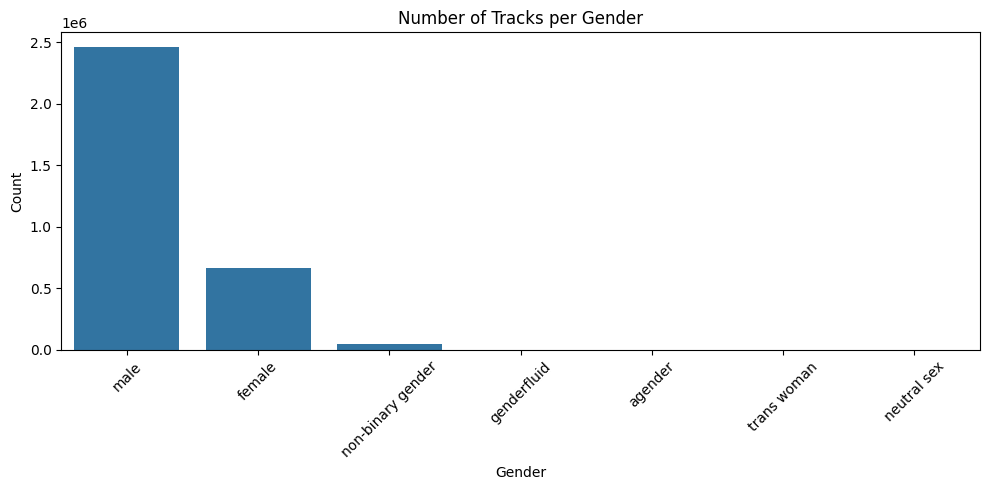

In [8]:
# 4. Visualise the number of tracks per gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='artist_gender', order=gender_counts.index)
plt.title("Number of Tracks per Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


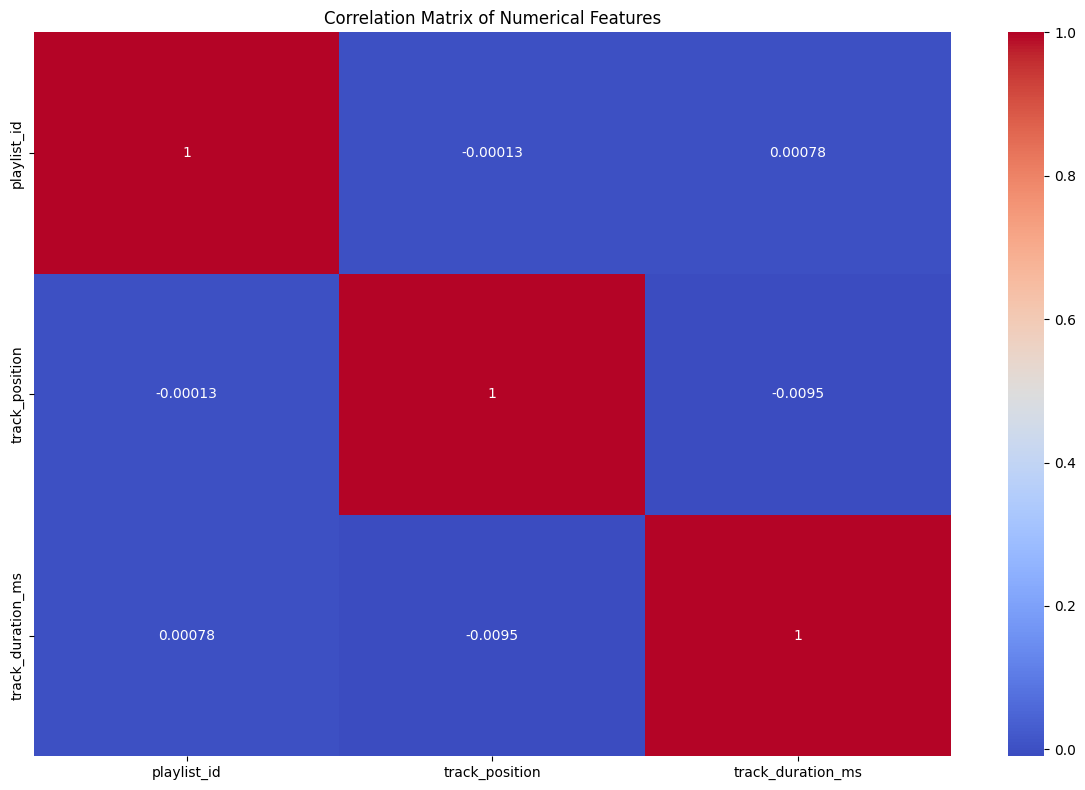

In [9]:
# 5. Optional: Correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

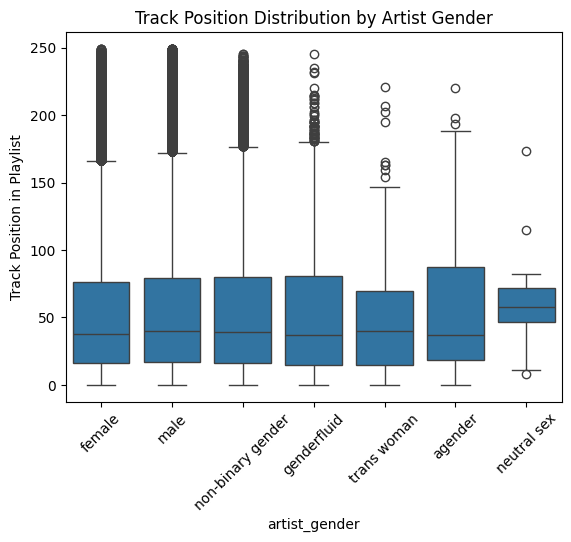

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average position per gender
sns.boxplot(data=filtered_df, x="artist_gender", y="track_position")
plt.title("Track Position Distribution by Artist Gender")
plt.ylabel("Track Position in Playlist")
plt.xticks(rotation=45)
plt.show()

### 🎯 Key Findings – Track Position by Artist Gender

- **Similar Medians**: Most gender groups (male, female, non-binary, genderfluid) have similar median track positions (~40–50).
- **Higher Variability**: Agender and neutral sex artists show wider position spreads, indicating inconsistent placement in playlists.
- **More Outliers**: Male and female artists have many high-position outliers (tracks placed near the playlist end).
- **Neutral Sex Bias**: Tracks by neutral sex artists tend to appear **later** in playlists (higher median position).
- **Trans Women**: Tend to have **lower variability** and fewer outliers, suggesting more consistent placement.

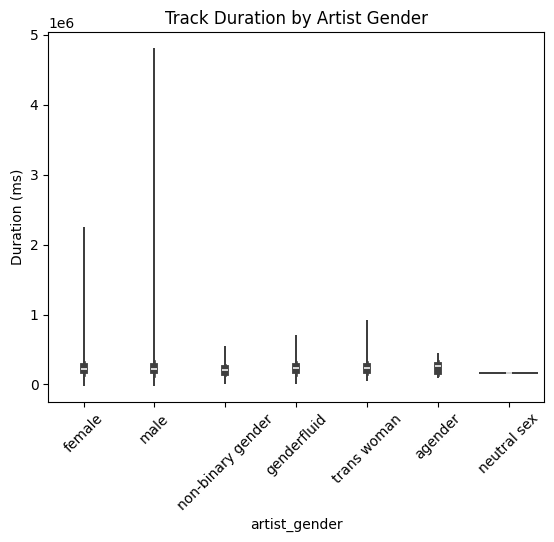

In [ ]:
sns.violinplot(data=filtered_df, x="artist_gender", y="track_duration_ms")
plt.title("Track Duration by Artist Gender")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.show()

#boxplot shows the distribution of track durations (in milliseconds) across different artist gender categories. 
# #While most values are tightly clustered, a few extreme outliers dominate the scale, particularly in male and female categories.


### 🕒 Key Findings – Track Duration by Artist Gender

- **Typical Track Durations Are Similar**: Most gender groups have comparable median durations (around 200,000–250,000 ms = 3.3–4.2 minutes).
- **Extreme Outliers in Male & Female**: A few tracks by male and female artists have abnormally high durations (up to 4–5 million ms, i.e., over 1 hour), strongly skewing the scale.
- **Compressed Ranges in Minoritized Genders**: Genderfluid, non-binary, agender, and neutral sex artists show narrower duration ranges, indicating more consistent track lengths.
- **Neutral Sex Tracks**: Appear especially uniform, with nearly no variance in duration.
- **Recommendation**: Consider removing or investigating outliers when analyzing duration-related trends, as they distort the visualization scale.

In [ ]:
#get more insight about the data types

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3174887 entries, 0 to 6685098
Data columns (total 11 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   playlist_id        int64 
 1   playlist_name      object
 2   track_position     int64 
 3   track_name         object
 4   artist_name        object
 5   album_name         object
 6   track_uri          object
 7   artist_uri         object
 8   album_uri          object
 9   track_duration_ms  int64 
 10  artist_gender      object
dtypes: int64(3), object(8)
memory usage: 290.7+ MB


In [ ]:
#check Column-Wise Missing Values = zero missing values
print(filtered_df.isnull().sum())


playlist_id          0
playlist_name        0
track_position       0
track_name           0
artist_name          0
album_name           0
track_uri            0
artist_uri           0
album_uri            0
track_duration_ms    0
artist_gender        0
dtype: int64


In [ ]:
#check for duplicates
print("Duplicate rows:", filtered_df.duplicated().sum())

Duplicate rows: 0


In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np

# 1. Lade gefilterte Datei
df = pd.read_csv("spotify_tracks_with_gender_filtered.csv")

# 2. Kategorien für Playlist und Track
df['playlist_id'] = df['playlist_id'].astype('category')
df['track_uri'] = df['track_uri'].astype('category')

# 3. Baue Interaktionsmatrix
interaction_matrix = csr_matrix((
    np.ones(len(df)),
    (df['playlist_id'].cat.codes, df['track_uri'].cat.codes)
))

# 4. Erstelle DataFrame mit Interaktionen
interaction_df = pd.DataFrame({
    'playlist_index': df['playlist_id'].cat.codes,
    'track_index': df['track_uri'].cat.codes,
    'artist_gender': df['artist_gender']
})

# 5. Erstelle Track-Metadaten
track_metadata = (
    df.drop_duplicates(subset='track_uri')[['track_uri', 'artist_gender']]
    .copy()
)
track_metadata['track_index'] = df['track_uri'].astype('category').cat.codes

# 6. (Optional) Speichern
interaction_df.to_csv("interactions.csv", index=False)
track_metadata.to_csv("track_metadata.csv", index=False)

print("Interaktions- und Trackdaten erfolgreich vorbereitet.")


Interaktions- und Trackdaten erfolgreich vorbereitet.
